- Count the number of supermarkets per brand (value_counts())
- Create barchart with number of supermarkets per brand
- use .PairGrid() method from seaborn to create scatterplotmatrix of lat, lon, pop, pop_dens, frg_pct, emp
- plot with the locations of supermarkets in different colors according to their brand (Denner, Volg, Landi with example in pdf)

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import pylab as py 

### Read data

In [ ]:
df = pd.read_csv('supermarkets_data_enriched.csv')
df.head(5)

,Unnamed: 0,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,POINT (9.0379152 47.1556157),227,Schänis,3315,3876,97.142857,13.054696,1408.0
1,1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
3,3,node,9019298862,47.155185,9.038472,Lidl,supermarket,NaN,NaN,NaN,POINT (9.0384722 47.1551854),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0


In [4]:
df = df.drop_duplicates().dropna()
df.head(5)

,Unnamed: 0,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


In [6]:
df[['brand']].describe()

,brand
count,917
unique,18
top,Migros
freq,335


### Number of supermarkets per brand

In [8]:
df[['brand']].value_counts()

brand                                
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Alnatura                                  11
Migros-Outlet                             11
VOI                                        4
Globus                                     2
Lidl Schweiz                               1
Rolog Krinner Cotub Titan Serac Molok      1
Jumbo                                      1
ZWIBOL                                     1
Name: count, dtype: int64

### Barchart

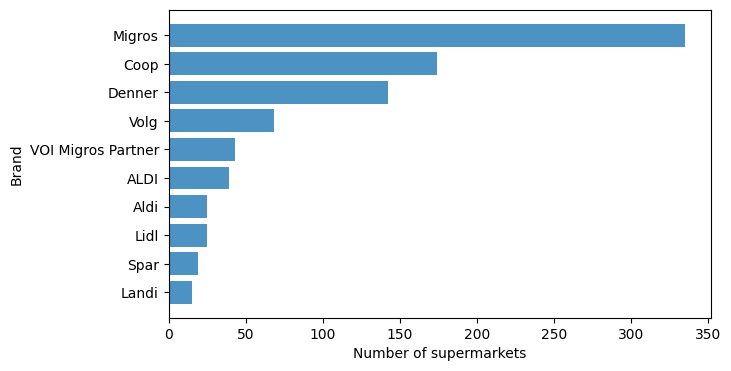

In [17]:
df_bar = df['brand'].value_counts().sort_values(ascending= True)
df_bar = df_bar.loc[df_bar >= 15]
vals = list(df_bar.values)
index = list(df_bar.index.values)
pos = np.arange(len(index))

fig, ax = plt.subplots(figsize= (7, 4))
ax.barh(index, vals, align= 'center', alpha= 0.8)
ax.set_xlabel('Number of supermarkets', fontsize= 10)
ax.set_ylabel('Brand', fontsize= 10)

plt.show()

### Scatterplot matrix 

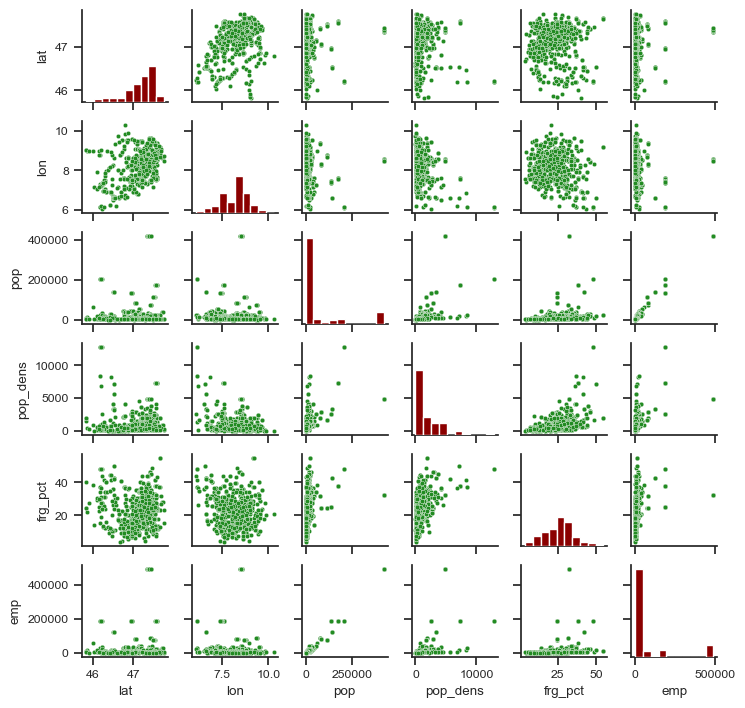

In [18]:
# lat, lon, pop, pop_dens, frg_pct, emp

sns.set(style= 'ticks', font_scale= 0.8)
g = sns.PairGrid(df[['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']], 
                 height= 1.2,
                 aspect= 1)
g.map_upper(sns.scatterplot, color= 'forestgreen', s= 10)
g.map_lower(sns.scatterplot, color= 'forestgreen', s= 10)
g.map_diag(plt.hist, color= 'darkred')

### Location plot 

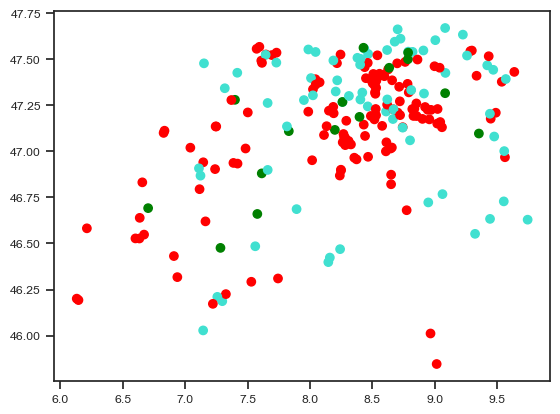

In [22]:
# Denner volg and Landi
df_locplot = df.loc[df['brand'].isin(['Denner', 'Volg', 'Landi'])]
col_dict = {'Denner': 'Red', 'Volg' : 'turquoise', 'Landi': 'green'}

plt.scatter(df_locplot['lon'], df_locplot['lat'], 
            c = df_locplot['brand'].map(col_dict))